# Plan for today:

* Example: "Hello world" of data science -- to get a sense what we will be doing in this class
* Introduction to Python
* Introduction to Numpy

# Hello world of data science: The Iris dataset

We will go through a typical Machine Learning pipeline on a well-known Iris dataset.

"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "*The use of multiple measurements in taxonomic problems*" as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other." (c) [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris setosa" width="200"/> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg" alt="Iris virginica" width="325"/> <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" alt="Iris versicolor" width="355"/>

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Step 1: Load the Iris data set

To start with an ML application, you first need to get the data. 

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]', 'iris type']
df = pd.read_csv(url, names=names)

Have a quick look at the data

In [3]:
df

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],iris type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 2: Visualize

In ML applications, you will often need to visualize your data or the results of your algorithms.

Plot the data with features $(x_1, x_2)\in\mathbb R^2$ where:
* $x_1$ denotes the sepal length in cm and
* $x_2$ denotes the petal width in cm.

Text(0, 0.5, 'petal width [cm]')

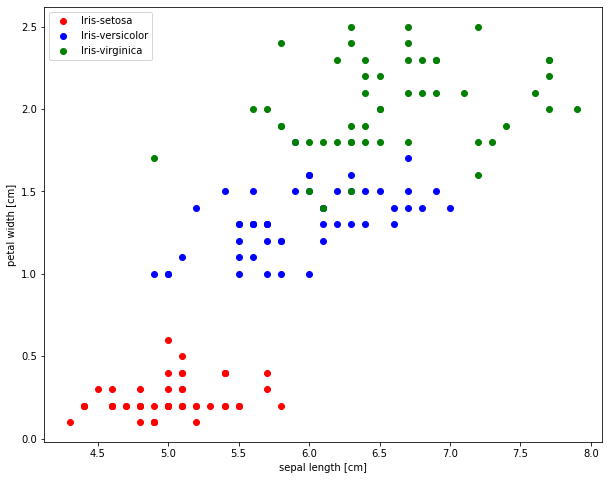

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

df_class = df[df['iris type'] == 'Iris-setosa']
ax.scatter(df_class['sepal length [cm]'], df_class['petal width [cm]'], c='red', label='Iris-setosa')

df_class = df[df['iris type'] == 'Iris-versicolor']
ax.scatter(df_class['sepal length [cm]'], df_class['petal width [cm]'], c='blue', label='Iris-versicolor')

df_class = df[df['iris type'] == 'Iris-virginica']
ax.scatter(df_class['sepal length [cm]'], df_class['petal width [cm]'], c='green', label='Iris-virginica')

ax.legend()
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('petal width [cm]')

## Step 3: Learning

In ML applications, you will need to choose an algorithm (often with a lot of hyperparameters!) and carry out the learning procedure, which normally involves numerical optimization of a certain objective function, also called empirical risk.

In our case, the task is to classify the irises into 3 classes. Thus, we are looking into multiclass classification algorithms.

First, we will split the data into train and test:

In [27]:
from sklearn.model_selection import train_test_split

df['class'] = df['iris type'].replace(
    ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    [1, 2, 3])
X = df[['sepal length [cm]','petal width [cm]']].to_numpy()
Y = df['class'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Text(0, 0.5, 'petal width [cm]')

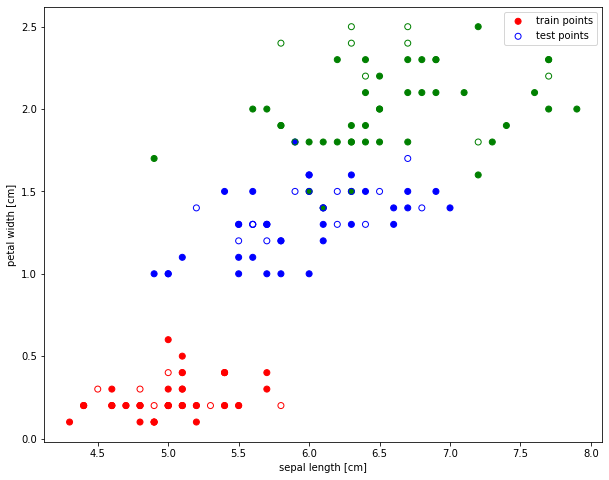

In [68]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(X_train[:, 0], X_train[:, 1], c=np.select([Y_train==1, Y_train==2, Y_train==3],
    ['red', 'blue', 'green']),label='train points')

ax.scatter(X_test[:, 0], X_test[:, 1], edgecolors=np.select([Y_test==1, Y_test==2, Y_test==3],
    ['red', 'blue', 'green']), facecolors='none', label='test points')

ax.legend()
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('petal width [cm]')

We will only use the train part for learning.

### Example 1: Least squares regression
We train a linear classifier with squared error, i.e. we solve the following optimization problem:

$$\min_w\mathcal{L}(X,Y,w) = \min_w \| Xw - Y\|_2^2$$

In [38]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(alpha=0).fit(X_train, Y_train)

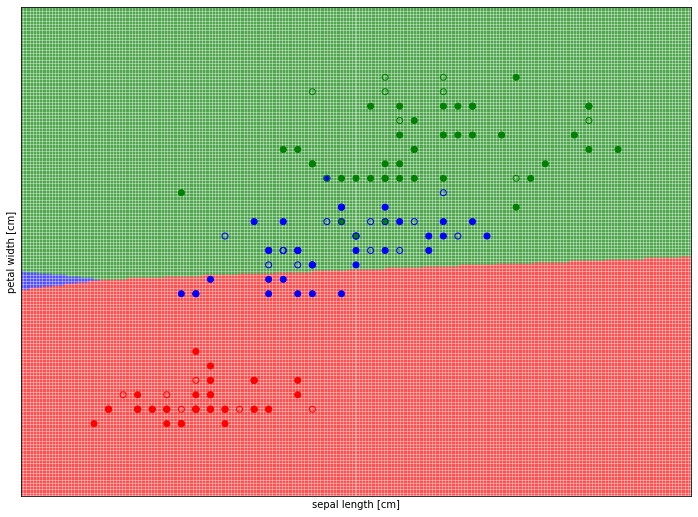

In [49]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
cMap = matplotlib.colors.ListedColormap(['red','blue','green'])
plt.pcolormesh(xx, yy, Z, alpha=0.25, cmap=cMap)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.select([Y_train==1, Y_train==2, Y_train==3],
    ['red', 'blue', 'green']))
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=np.select([Y_test==1, Y_test==2, Y_test==3],
    ['red', 'blue', 'green']), facecolors='none')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Step 4: Evaluate model's performace

After you have a trained model, you need to check how well it performs.

Our data is not linearly separable, so we cannot get a perfect solution with a linear model. The current model also gives quite a low accuracy score:

In [51]:
print('Train accuracy: ', clf.score(X_train,Y_train))
print('Test accuracy: ', clf.score(X_test,Y_test))

Train accuracy:  0.7238095238095238
Test accuracy:  0.5333333333333333


### Example 2: Logistic Regression

We can try a different linear model -- Logistic Regression. Here we have a different loss function and, thus, a different optimization problem:

 $$\min_w\mathcal{L}(X,Y,w) = \min_w \sum_{i=1}^n \log(\exp(-y_iX_i^Tw)+1)$$

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none',fit_intercept=False).fit(X_train, Y_train)

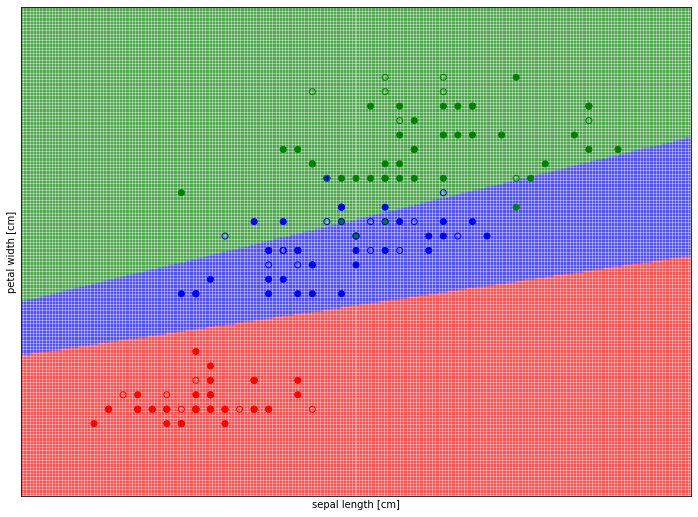

In [56]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
cMap = matplotlib.colors.ListedColormap(['red','blue','green'])
plt.pcolormesh(xx, yy, Z, alpha=0.25, cmap=cMap)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.select([Y_train==1, Y_train==2, Y_train==3],
    ['red', 'blue', 'green']))
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=np.select([Y_test==1, Y_test==2, Y_test==3],
    ['red', 'blue', 'green']), facecolors='none')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

We can see that with this method we get a much better accuracy.

In [57]:
print('Train accuracy: ', clf.score(X_train,Y_train))
print('Test accuracy: ', clf.score(X_test,Y_test))

Train accuracy:  0.9142857142857143
Test accuracy:  0.8888888888888888


### Example 3: SVM with RBF kernel

We can also train a non-linear model (SVM with RBF kernel) to get even better results:

In [58]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X_train, Y_train)

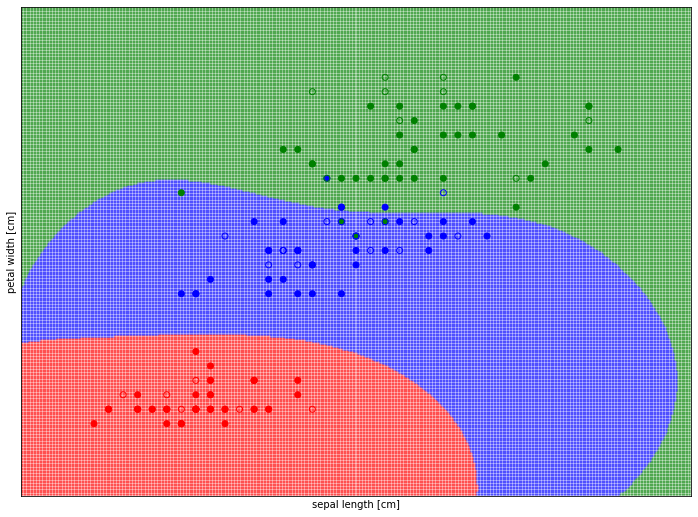

In [59]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
cMap = matplotlib.colors.ListedColormap(['red','blue','green'])
plt.pcolormesh(xx, yy, Z, alpha=0.25, cmap=cMap)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.select([Y_train==1, Y_train==2, Y_train==3],
    ['red', 'blue', 'green']))
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=np.select([Y_test==1, Y_test==2, Y_test==3],
    ['red', 'blue', 'green']), facecolors='none')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [60]:
print('Train accuracy: ', clf.score(X_train,Y_train))
print('Test accuracy: ', clf.score(X_test,Y_test))

Train accuracy:  0.9333333333333333
Test accuracy:  0.9555555555555556
